<img src="https://www.dane.gov.co/files/images/logos/logo-dane.svg" alt="Universidade Federal do Ceará" style="width: 190px;" align="left" frameborder="300"/>

**DANE - Detección de anomalías** <br>
**Carlos Eduardo Gutiérrez Urueña**  <br><br>

In [1]:
import numpy as np
import pandas as pd
from pyod.utils.data import generate_data
from pyod.models.hbos import HBOS
import matplotlib.pyplot as plt

In [2]:
# Creando un conjunto de datos aleatorios de entrenamiento y de validación con un porcentaje del 5% de atípicos
X_train, X_test, Y_train, Y_test  = generate_data(
    n_train = 500,
    n_test = 500,
    n_features = 6,
    contamination = 0.05,
    random_state = 123)

In [3]:
# Convirtiendo el conjunto de datos de entrenamiento en un DataFrame
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5
0,2.396090,2.092611,2.073392,1.988262,1.953473,2.450997
1,1.631040,1.746182,1.898050,2.380148,1.967332,1.858916
2,1.824683,2.131412,2.028829,1.703454,2.502966,2.119108
3,2.106098,2.165173,2.340826,2.170109,1.749139,1.678661
4,1.829647,1.775596,1.829438,2.054768,1.577190,1.594549


In [4]:
Y_train_pd = pd.DataFrame(Y_train)
Y_train_pd.head(20)
Y_train_pd[0].unique()

array([0., 1.])

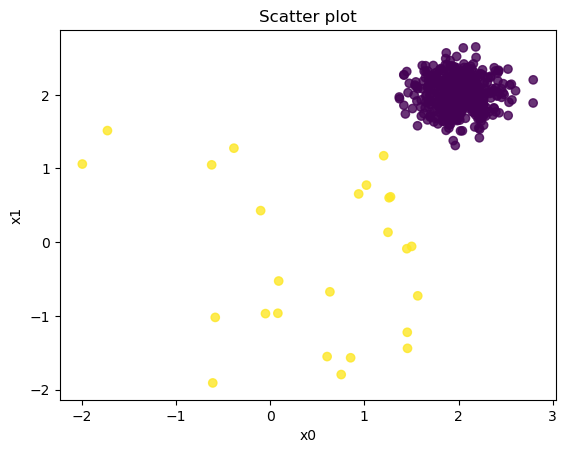

In [5]:
# Graficando las variables 0 y 1 en un scatter plot e identificando atípicos. Amarillo atípicos, morados, datos normales
plt.scatter(X_train_pd[0], X_train_pd[1], c = Y_train, alpha = 0.8) # c es la lista de colores de acuerdo con los valores únicos de esta variable, la cual en la líne anterior es 1,0
plt.title("Scatter plot")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [12]:
# Creando el modelo HBOS

n_bins = 50
hbos = HBOS(n_bins = n_bins, contamination = 0.05)
hbos.fit(X_train)

HBOS(alpha=0.1, contamination=0.05, n_bins=50, tol=0.5)

In [7]:
print("El umbral para los datos de ratio contaminados: ", hbos.threshold_)

El umbral para los datos de ratio contaminados:  5.563712646460526


In [8]:
# Creando las puntuaciones para los datos de entrenamiento y prediciendo cuando una instancia es atípica o no
# la función predict compara la puntuación de los datos atípicoscon el umbral. Si la puntuación de un atípico es mayor al umbral, la función asigna 1, o en caso contrario , 0
# Datos de entrenamiento

Y_train_scores = hbos.decision_function(X_train)
Y_train_pred = hbos.predict(X_train)

# Datos de testeo o validación
Y_test_scores = hbos.decision_function(X_test)
Y_test_pred = hbos.predict(X_test)

In [9]:
Y_train_pred
#contanto el número de valores predichos
def count_stat(vector):
    unique, counts = np.unique(vector,
                               return_counts = True)
    return dict(zip(unique, counts))

print("Los datos de entrenamiento: ", count_stat(Y_train_pred))
print("Los datos de validación o test: ", count_stat(Y_test_pred))

Los datos de entrenamiento:  {0: 475, 1: 25}
Los datos de validación o test:  {0: 474, 1: 26}


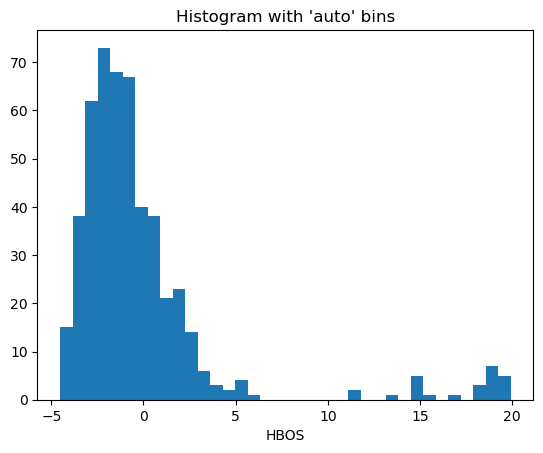

In [10]:
plt.hist(Y_test_scores, bins = 'auto')
plt.title("Histogram with 'auto' bins")
plt.xlabel('HBOS')
plt.show()

In [39]:
Y_test_score

array([-4.80781484e-01, -1.11866907e+00, -2.43693211e+00, -5.40879477e-01,
       -2.09225820e+00, -4.34171923e+00,  1.74674957e+00,  5.25220724e-01,
       -1.07538917e+00, -1.98603732e+00,  4.79636719e-01, -3.66919565e+00,
       -2.10284534e+00, -2.72837300e+00,  5.56018300e-01,  3.89884407e-01,
       -8.28258328e-01, -4.48480899e+00, -2.34447683e-02,  7.57915991e-01,
       -2.82091320e+00, -4.40572801e-01,  2.44843271e+00, -4.20926463e+00,
       -2.34987545e+00, -1.05380230e+00,  4.33972399e-01, -1.19457951e+00,
        4.23612214e-03, -3.15929114e+00, -4.18019388e+00, -3.75305578e+00,
       -1.53717610e+00,  9.17913044e-01,  1.31485307e+00, -3.06863243e+00,
       -3.47241996e+00, -3.24422485e+00, -6.49522962e-01, -8.46569404e-01,
       -1.92282869e+00, -2.60901382e+00, -6.35421775e-01, -2.96397469e+00,
       -1.73125884e+00, -1.74672552e+00, -9.14932057e-01, -2.75291943e+00,
       -1.16167791e+00, -3.11148083e-01, -1.28774295e+00,  2.10614015e+00,
       -2.28630044e+00, -